## Загрузим нужные библиотеки

In [7]:
# !pip install pandas seaborn matplotlib sklearn

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from os import listdir 

%matplotlib inline

In [9]:
df_train = pd.read_csv("/home/docker_current/datasets/train.csv")

In [10]:
print("Обучающей выборки " ,len(listdir("/home/docker_current/datasets/train")))

Обучающей выборки  2098


## Рассмотрим датасет по ближе

In [14]:
df_train.head(3)

,id,description,object_img
0,520,Фотография. Г. Пермь. Здание горисполкома. ПО...,799
1,1817,Фотонегатив пленочный. Труппа театра «У моста»...,854
2,188,"Изразец гладкий расписной ""пермский""- карниз А...",1794


In [15]:
df_train.shape

(2098, 3)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2098 non-null   int64 
 1   description  2098 non-null   object
 2   object_img   2098 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 49.3+ KB


## Добавим новых признаков

In [17]:
df_train["len_description"] = df_train.description.map(len)

In [18]:
df_train["object"] = df_train["description"].map(lambda x : x.split()[0]) 

In [19]:
df_train["object"] = pd.Categorical(df_train["object"])
df_train["object"].astype('category').cat.codes
df_train["object"] = df_train["object"].cat.codes

In [20]:
df_train.head(3)

,id,description,object_img,len_description,object
0,520,Фотография. Г. Пермь. Здание горисполкома. ПО...,799,84,78
1,1817,Фотонегатив пленочный. Труппа театра «У моста»...,854,145,80
2,188,"Изразец гладкий расписной ""пермский""- карниз А...",1794,314,21


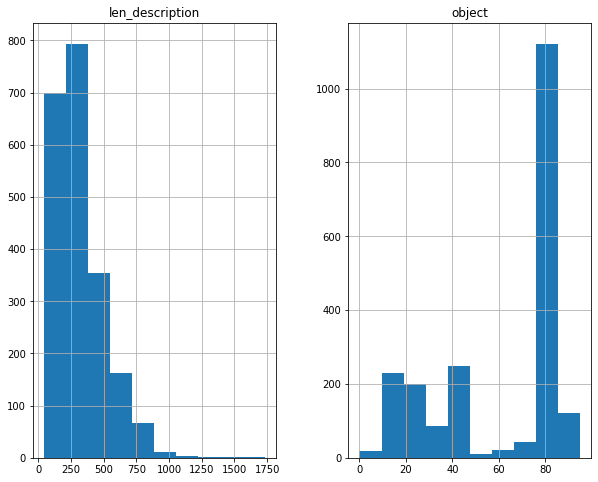

In [21]:
features = list(set(df_train.columns.values) - set(['id',"object_img"]))

_ = df_train[features].hist(figsize=(10,8))

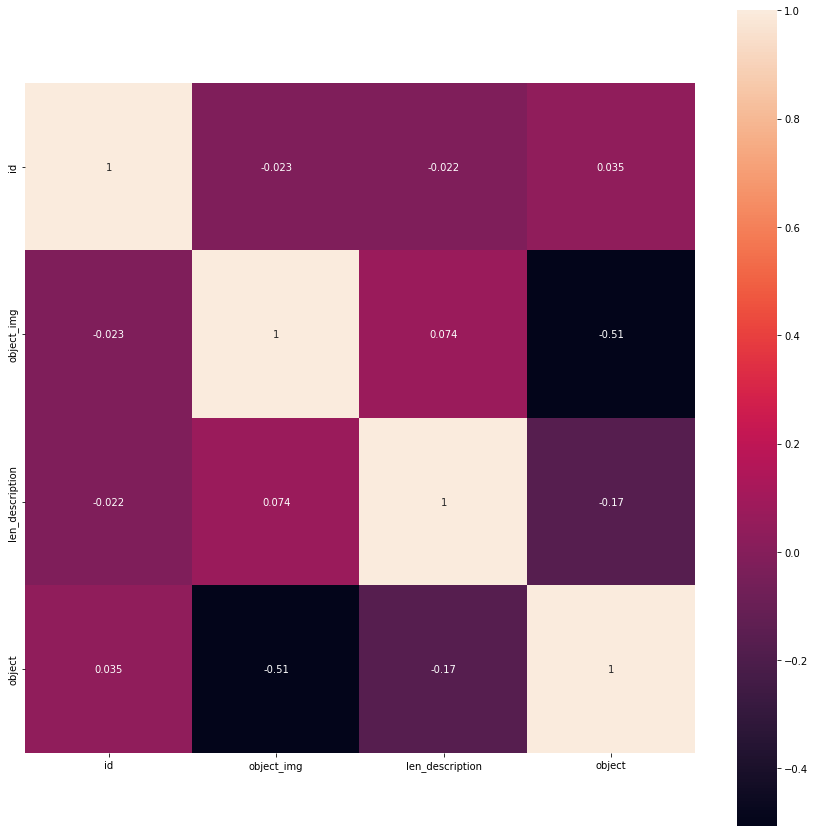

In [22]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [23]:
X = df_train.drop(["description","object_img",'id'], axis = 1)
y = df_train['object_img']

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   len_description  2098 non-null   int64
 1   object           2098 non-null   int8 
dtypes: int64(1), int8(1)
memory usage: 18.6 KB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Работа с моделью 

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression().fit(X, y)

## Оценка точности

In [29]:
pred = reg.predict(X_test)

In [30]:
y_test.head(3)

1005    1416
1078    2654
67      1836
Name: object_img, dtype: int64

In [31]:
from sklearn.metrics import r2_score

print("R2 score:", r2_score(y_test, pred))

R2 score: 0.3072931022741474
